In [2]:
import numpy as np
from qiskit import *
from scipy import linalg

from qiskit.visualization import *
from qiskit.quantum_info.operators import Operator
from util import *

In [3]:
X = np.array([[0, 1], [1, 0]], dtype = 'complex_')
Y = np.array([[0, -1j], [1j, 0]], dtype = 'complex_')
Z = np.array([[1, 0], [0, -1]], dtype = 'complex_')

In [4]:
fSWAP = np.array([[1, 0, 0, 0],
                  [0, 0, 1, 0],
                  [0, 1, 0, 0],
                  [0, 0, 0, -1]])

theta = np.pi
eta = 1
pSWAP = np.array([[1, 0,                                  0,                                 0],
                  [0, np.cos(theta/2),                    1j*np.exp(1j*eta)*np.sin(theta/2), 0],
                  [0, 1j*np.exp(-1j*eta)*np.sin(theta/2), np.cos(theta/2),                   0],
                  [0, 0,                                  0,                                 1]])

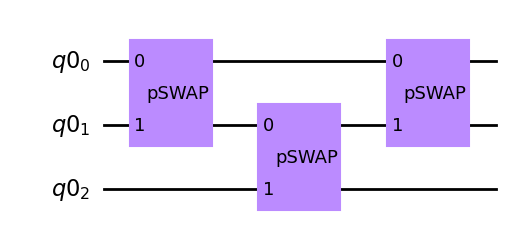

In [5]:
q = QuantumRegister(3)
qc = QuantumCircuit(q)

fswap = Operator(fSWAP)
pswap = Operator(pSWAP)


qc.unitary(pswap, [0, 1], label="pSWAP")
qc.unitary(pswap, [1, 2], label="pSWAP")
qc.unitary(pswap, [0, 1], label="pSWAP")


qc.draw("mpl")

In [6]:
array_to_latex(circuit2matrix(qc, keep_qiskit_ordering=False))

<IPython.core.display.Latex object>

In [68]:
from sympy import *
from sympy.physics.quantum import TensorProduct
from IPython.display import display
from sympy import re, im, I, E, symbols

J = symbols("J")
X = Matrix([[0, 1], [1, 0]])
Y = Matrix([[0, -I], [I, 0]])
Z = Matrix([[1, 0], [0, -1]])
Id = Matrix([[1, 0], [0, 1]])

H = exp(-I*(TensorProduct(X,Z,Z,X) + TensorProduct(Y,Z,Z,Y)))

In [69]:
display(H)

Matrix([
[1,                        0, 0,                        0, 0,                        0, 0,                        0,                        0, 0,                        0, 0,                        0, 0,                        0, 0],
[0, exp(-2*I)/2 + exp(2*I)/2, 0,                        0, 0,                        0, 0,                        0, exp(-2*I)/2 - exp(2*I)/2, 0,                        0, 0,                        0, 0,                        0, 0],
[0,                        0, 1,                        0, 0,                        0, 0,                        0,                        0, 0,                        0, 0,                        0, 0,                        0, 0],
[0,                        0, 0, exp(-2*I)/2 + exp(2*I)/2, 0,                        0, 0,                        0,                        0, 0, exp(2*I)/2 - exp(-2*I)/2, 0,                        0, 0,                        0, 0],
[0,                        0, 0,                       

In [79]:
theta = pi
eta = 1
pSWAP = Matrix([[1, 0,                           0,                          0],
                [0, cos(theta/2),                I*exp(1j*eta)*sin(theta/2), 0],
                [0, I*exp(-1j*eta)*sin(theta/2), cos(theta/2),               0],
                [0, 0,                           0,                          1]])

In [80]:
display(pSWAP)

Matrix([
[1,             0,            0, 0],
[0,             0, I*exp(1.0*I), 0],
[0, I*exp(-1.0*I),            0, 0],
[0,             0,            0, 1]])

In [81]:
P1 = TensorProduct(pSWAP, Id, Id)*TensorProduct(Id,pSWAP,Id)*TensorProduct(Id,Id,pSWAP)*TensorProduct(Id,pSWAP,Id)*TensorProduct(pSWAP, Id,Id)

In [82]:
theta = 2*pi
eta = 1
pSWAP = Matrix([[1, 0,                           0,                          0],
                [0, cos(theta/2),                I*exp(1j*eta)*sin(theta/2), 0],
                [0, I*exp(-1j*eta)*sin(theta/2), cos(theta/2),               0],
                [0, 0,                           0,                          1]])

In [83]:
display(pSWAP)

Matrix([
[1,  0,  0, 0],
[0, -1,  0, 0],
[0,  0, -1, 0],
[0,  0,  0, 1]])

In [84]:
P2 = TensorProduct(pSWAP, Id, Id)*TensorProduct(Id,pSWAP,Id)*TensorProduct(Id,Id,pSWAP)*TensorProduct(Id,pSWAP,Id)*TensorProduct(pSWAP, Id,Id)

In [85]:
display(P2*P1)

Matrix([
[1,              0, 0,             0,  0,              0,  0,             0,            0,  0,             0,  0,            0, 0,             0, 0],
[0,              0, 0,             0,  0,              0,  0,             0, I*exp(3.0*I),  0,             0,  0,            0, 0,             0, 0],
[0,              0, 1,             0,  0,              0,  0,             0,            0,  0,             0,  0,            0, 0,             0, 0],
[0,              0, 0,             0,  0,              0,  0,             0,            0,  0, -I*exp(3.0*I),  0,            0, 0,             0, 0],
[0,              0, 0,             0, -1,              0,  0,             0,            0,  0,             0,  0,            0, 0,             0, 0],
[0,              0, 0,             0,  0,              0,  0,             0,            0,  0,             0,  0, I*exp(3.0*I), 0,             0, 0],
[0,              0, 0,             0,  0,              0, -1,             0,            0, 

In [95]:
display(exp(TensorProduct(X,Z,Z,X) + TensorProduct(Y,Z,Z,Y)))

Matrix([
[1,                     0, 0,                     0, 0,                     0, 0,                     0,                     0, 0,                     0, 0,                     0, 0,                     0, 0],
[0,  exp(-2)/2 + exp(2)/2, 0,                     0, 0,                     0, 0,                     0, -exp(-2)/2 + exp(2)/2, 0,                     0, 0,                     0, 0,                     0, 0],
[0,                     0, 1,                     0, 0,                     0, 0,                     0,                     0, 0,                     0, 0,                     0, 0,                     0, 0],
[0,                     0, 0,  exp(-2)/2 + exp(2)/2, 0,                     0, 0,                     0,                     0, 0, -exp(2)/2 + exp(-2)/2, 0,                     0, 0,                     0, 0],
[0,                     0, 0,                     0, 1,                     0, 0,                     0,                     0, 0,                     